<a href="https://colab.research.google.com/github/DeeeTeeee/Credit_Card_Prediction_with_Pycaret/blob/main/Sepsis_Classification_with_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pycaret
# !pip install pycaret[experimental]
#!pip install gradio

In [81]:
# import libraries**
import pandas as pd
import numpy as np

import pandas as pd

url_test = 'https://raw.githubusercontent.com/DeeeTeeee/SepsisClassificationWithFastAPI/main/Datasets/Paitients_Files_Test.csv'
test_df = pd.read_csv(url_test,index_col=0)
#df = pd.read_csv(url)
url_train = 'https://raw.githubusercontent.com/DeeeTeeee/SepsisClassificationWithFastAPI/main/Datasets/Paitients_Files_Train.csv'

train_df = pd.read_csv(url_train,index_col=0)
print(test_df.head(5))
print(train_df.head(5))

           PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
ID                                                           
ICU200609    1  109  38  18  120  23.1  0.407   26          1
ICU200610    1  108  88  19    0  27.1  0.400   24          1
ICU200611    6   96   0   0    0  23.7  0.190   28          1
ICU200612    1  124  74  36    0  27.8  0.100   30          1
ICU200613    7  150  78  29  126  35.2  0.692   54          0
           PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
ID                                                                     
ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive


In [82]:
print(train_df.shape, test_df.shape)

(599, 10) (169, 9)


In [83]:
train_df.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [84]:
# check data types
data.dtypes

PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object

In [85]:
data=train_df.sample(frac=0.95, random_state=786)

In [86]:
data.shape

(569, 10)

In [87]:
data_unseen = train_df.drop(data.index)
data_unseen.shape

(30, 10)

In [88]:
data.reset_index(inplace=True, drop = True)
data_unseen.reset_index(inplace = True, drop = True)

In [89]:
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data for Prediction: ' + str(data_unseen.shape))
print('Original Test data: ' + str(test_df.shape))

Data for Modeling: (569, 10)
Unseen Data for Prediction: (30, 10)
Original Test data: (169, 9)


In [90]:
clf01 = setup(data=data, target='Sepssis', session_id=123)

,Description,Value
0,Session id,123
1,Target,Sepssis
2,Target type,Binary
3,Target mapping,"Negative: 0, Positive: 1"
4,Original data shape,"(569, 10)"
5,Transformed data shape,"(569, 10)"
6,Transformed train set shape,"(398, 10)"
7,Transformed test set shape,"(171, 10)"
8,Numeric features,9
9,Preprocess,True


In [91]:
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7666,0.8162,0.5703,0.7010,0.6178,0.4555,0.4674,0.5270
lda,Linear Discriminant Analysis,0.7691,0.8159,0.5632,0.7093,0.6174,0.4583,0.4710,0.0840
rf,Random Forest Classifier,0.7465,0.8130,0.5560,0.6540,0.5903,0.4124,0.4216,0.2670
et,Extra Trees Classifier,0.7366,0.8125,0.5060,0.6531,0.5595,0.3807,0.3916,0.2470
gbc,Gradient Boosting Classifier,0.7542,0.8093,0.5500,0.6687,0.5978,0.4262,0.4330,0.1610
nb,Naive Bayes,0.7390,0.7990,0.5560,0.6443,0.5857,0.4002,0.4098,0.0840
qda,Quadratic Discriminant Analysis,0.7289,0.7930,0.5132,0.6286,0.5559,0.3677,0.3761,0.1540
xgboost,Extreme Gradient Boosting,0.7267,0.7793,0.5791,0.6089,0.5876,0.3857,0.3894,0.0920
lightgbm,Light Gradient Boosting Machine,0.7190,0.7759,0.5352,0.6047,0.5582,0.3572,0.3636,0.2140
ada,Ada Boost Classifier,0.7465,0.7676,0.5714,0.6509,0.6004,0.4184,0.4260,0.2770


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [92]:
# compare all models**
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7666,0.8162,0.5703,0.7010,0.6178,0.4555,0.4674,0.1440
lda,Linear Discriminant Analysis,0.7691,0.8159,0.5632,0.7093,0.6174,0.4583,0.4710,0.1560
rf,Random Forest Classifier,0.7465,0.8130,0.5560,0.6540,0.5903,0.4124,0.4216,0.2440
et,Extra Trees Classifier,0.7366,0.8125,0.5060,0.6531,0.5595,0.3807,0.3916,0.2640
gbc,Gradient Boosting Classifier,0.7542,0.8093,0.5500,0.6687,0.5978,0.4262,0.4330,0.2930
nb,Naive Bayes,0.7390,0.7990,0.5560,0.6443,0.5857,0.4002,0.4098,0.0840
qda,Quadratic Discriminant Analysis,0.7289,0.7930,0.5132,0.6286,0.5559,0.3677,0.3761,0.0820
xgboost,Extreme Gradient Boosting,0.7267,0.7793,0.5791,0.6089,0.5876,0.3857,0.3894,0.0900
lightgbm,Light Gradient Boosting Machine,0.7190,0.7759,0.5352,0.6047,0.5582,0.3572,0.3636,0.1150
ada,Ada Boost Classifier,0.7465,0.7676,0.5714,0.6509,0.6004,0.4184,0.4260,0.1620


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [93]:
# print best_model parameters**
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [94]:
# Create a Decision Tree Classifier model
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.8269,0.3571,0.6250,0.4545,0.2683,0.2883
1,0.7250,0.7555,0.7143,0.5882,0.6452,0.4241,0.4294
2,0.7750,0.7912,0.5714,0.7273,0.6400,0.4798,0.4871
3,0.7750,0.8462,0.7143,0.6667,0.6897,0.5135,0.5143
4,0.7250,0.7280,0.5714,0.6154,0.5926,0.3855,0.3861
5,0.7500,0.8544,0.4286,0.7500,0.5455,0.3902,0.4193
6,0.7750,0.7637,0.5000,0.7778,0.6087,0.4611,0.4832
7,0.8000,0.8034,0.5385,0.7778,0.6364,0.5046,0.5209
8,0.9231,0.9734,0.9231,0.8571,0.8889,0.8302,0.8315


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Hyperparameter Tuning

In [95]:
# tune best model**

tune_rf = tune_model(lr)
print(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.8187,0.3571,0.6250,0.4545,0.2683,0.2883
1,0.7250,0.7473,0.7143,0.5882,0.6452,0.4241,0.4294
2,0.7750,0.7940,0.5714,0.7273,0.6400,0.4798,0.4871
3,0.7750,0.8434,0.7143,0.6667,0.6897,0.5135,0.5143
4,0.7250,0.7253,0.5714,0.6154,0.5926,0.3855,0.3861
5,0.7500,0.8516,0.4286,0.7500,0.5455,0.3902,0.4193
6,0.7750,0.7637,0.5000,0.7778,0.6087,0.4611,0.4832
7,0.8250,0.8063,0.6154,0.8000,0.6957,0.5758,0.5855
8,0.9231,0.9675,0.9231,0.8571,0.8889,0.8302,0.8315


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


#  Model Analysis

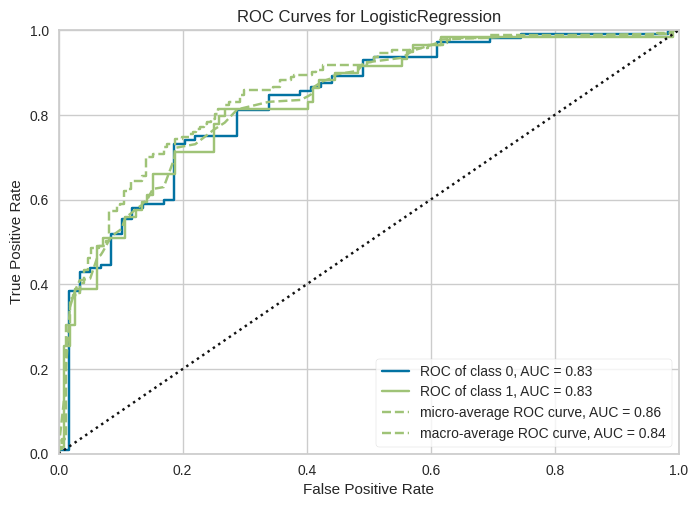

In [96]:
# AUC Plot**
plot_model(lr, plot = 'auc')

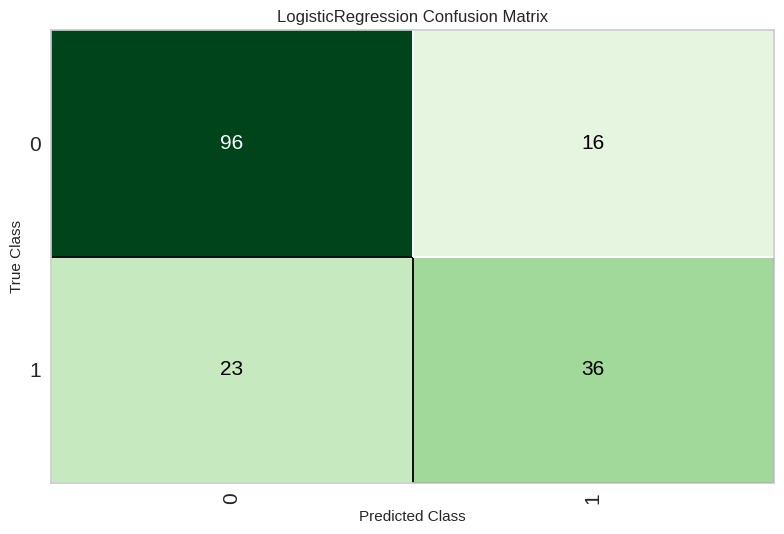

In [97]:
# Confusion Matrix**
plot_model(lr, plot = 'confusion_matrix')

In [98]:
unseen_pred = predict_model(lr,data = data_unseen )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6667,0.7778,0.4167,0.6250,0.5000,0.2647,0.2770


In [99]:
unseen_pred

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,prediction_label,prediction_score
0,5,116,74,0,0,25.600000,0.201,30,1,0,Negative,0.8452
1,1,146,56,0,0,29.700001,0.564,29,1,0,Negative,0.6351
2,7,103,66,32,0,39.099998,0.344,31,1,1,Negative,0.6091
3,1,71,48,18,76,20.400000,0.323,22,1,0,Negative,0.9807
4,2,107,74,30,100,33.599998,0.404,23,1,0,Negative,0.8139
5,3,170,64,37,225,34.500000,0.356,30,0,1,Positive,0.6844
6,6,85,78,0,0,31.200001,0.382,42,1,0,Negative,0.8611
7,1,138,82,0,0,40.099998,0.236,28,1,0,Negative,0.5398
8,0,108,68,20,0,27.299999,0.787,32,0,0,Negative,0.8876
9,7,179,95,31,0,34.200001,0.164,60,1,0,Positive,0.8024


In [ ]:
# Map 'Negative' to 0 and 'Positive' to 1 in the 'prediction_label' column
unseen_pred['prediction_label'] = unseen_pred['prediction_label'].map({'Negative': 0, 'Positive': 1})

In [101]:
unseen_pred

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,prediction_label,prediction_score
0,5,116,74,0,0,25.600000,0.201,30,1,0,0,0.8452
1,1,146,56,0,0,29.700001,0.564,29,1,0,0,0.6351
2,7,103,66,32,0,39.099998,0.344,31,1,1,0,0.6091
3,1,71,48,18,76,20.400000,0.323,22,1,0,0,0.9807
4,2,107,74,30,100,33.599998,0.404,23,1,0,0,0.8139
5,3,170,64,37,225,34.500000,0.356,30,0,1,1,0.6844
6,6,85,78,0,0,31.200001,0.382,42,1,0,0,0.8611
7,1,138,82,0,0,40.099998,0.236,28,1,0,0,0.5398
8,0,108,68,20,0,27.299999,0.787,32,0,0,0,0.8876
9,7,179,95,31,0,34.200001,0.164,60,1,0,1,0.8024


In [102]:

# Calculate the AUC metric
accuracy = check_metric(unseen_pred['Sepssis'], unseen_pred['prediction_label'], metric='AUC')
print('The AUC metric is:', accuracy * 100)


The AUC metric is: 62.5


In [103]:
# Make predictions on the test dataset using the best model
test_df_pred = predict_model(lr, data=test_df)

In [106]:
test_df_pred

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,prediction_label,prediction_score
ID,,,,,,,,,,,
ICU200609,1,109,38,18,120,23.100000,0.407,26,1,0,0.9109
ICU200610,1,108,88,19,0,27.100000,0.400,24,1,0,0.9091
ICU200611,6,96,0,0,0,23.700001,0.190,28,1,0,0.8844
ICU200612,1,124,74,36,0,27.799999,0.100,30,1,0,0.8624
ICU200613,7,150,78,29,126,35.200001,0.692,54,0,1,0.7287
...,...,...,...,...,...,...,...,...,...,...,...
ICU200773,10,101,76,48,180,32.900002,0.171,63,1,0,0.6408
ICU200774,2,122,70,27,0,36.799999,0.340,27,1,0,0.6787
ICU200775,5,121,72,23,112,26.200001,0.245,30,1,0,0.8023


In [105]:
# Map 'Negative' to 0 and 'Positive' to 1 in the 'prediction_label' column
test_df_pred['prediction_label'] = test_df_pred['prediction_label'].map({'Negative': 0, 'Positive': 1})

In [107]:
test_df_accuracy = check_metric(test_df_pred['prediction_label'], test_df_pred['prediction_score'],metric='Accuracy')
print('The accuracy is:', test_df_accuracy * 100)

The accuracy is: 73.37


In [108]:
import pickle

# Save the model
with open('lr.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [ ]:
# !pip install gradio
# !pip install pycaret[mlops]


In [ ]:

# # train a model
lr = create_model('lr')

# create app
create_app(lr)